In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading data

df = pd.read_csv("Netflix_movies_and_tv_shows_clustering.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
df.shape

(7787, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [5]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [6]:
# Data Cleaning and Preprocessing

# Converting date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

In [7]:
# Extracting year and month from datetime

df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [8]:
# Filling null with unknown

for col in ['director', 'cast', 'country', 'rating']:
    df[col] = df[col].fillna('0')

In [9]:
# Filling duration nulls 

df['duration'] = df['duration'].fillna('0')

In [10]:
# Splitting duration for TV's and Movie Shows

df['duration_num'] = df['duration'].str.extract('(\d+)').astype(int)
df['duration_type'] = df['duration'].str.extract('([a-zA-Z])')

In [11]:
# Creating Genre count column

df['genre_count'] = df['listed_in'].apply(lambda x: len(x.split(',')))

In [15]:
df['genre_count'].value_counts()

3    3298
2    2688
1    1801
Name: genre_count, dtype: int64

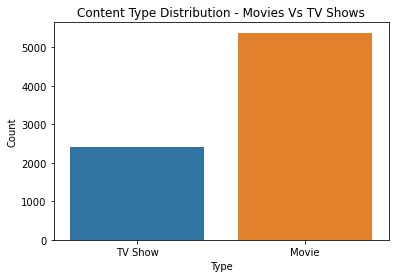

In [17]:
# Exploratory Data Analysis and Visualization
#Type Distribution

sns.countplot(x='type', data=df)
plt.title('Content Type Distribution - Movies Vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

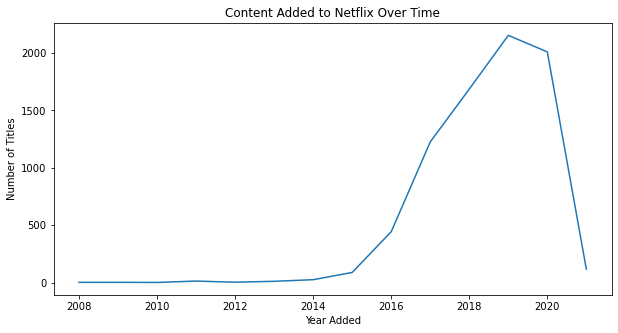

In [18]:
# Content Added by Year

content_by_year = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x = content_by_year.index, y=content_by_year.values)
plt.title('Content Added to Netflix Over Time')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.show()

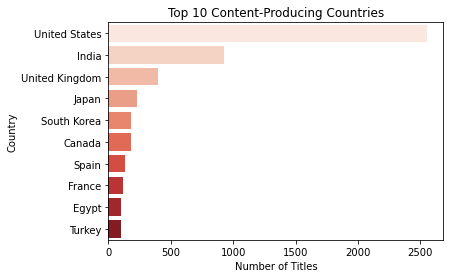

In [31]:
# Top 10 Countries

top_countries = df['country'].value_counts().drop('0').head(10)

sns.barplot(x=top_countries.values, y=top_countries.index, palette='Reds')
plt.title('Top 10 Content-Producing Countries')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

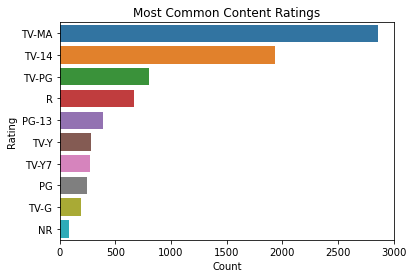

In [37]:
# Most Common Ratings

sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index[:10])
plt.title('Most Common Content Ratings')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

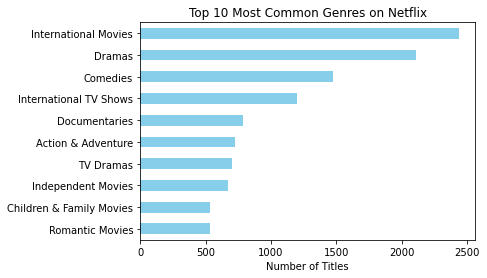

In [39]:
# Top 10 Genres

from collections import Counter

all_genres = df['listed_in'].str.split(',').explode().str.strip()
top_genres = pd.Series(Counter(all_genres)).sort_values(ascending=False).head(10)

top_genres.plot(kind='barh', color='skyblue')
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Number of Titles')
plt.gca().invert_yaxis()
plt.show()

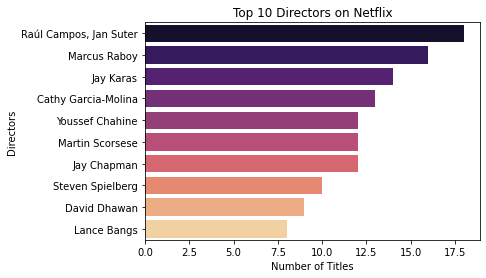

In [40]:
# Director Frequency

top_directors = df[df['director'] != '0']['director'].value_counts().head(10)

sns.barplot(x=top_directors.values, y=top_directors.index, palette='magma')
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Directors')
plt.show()

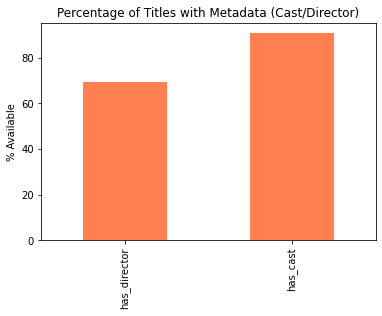

In [41]:
# Checking metadata quality

df['has_director'] = df['director'] != '0'
df['has_cast'] = df['cast'] != '0'

metadata_quality = df[['has_director', 'has_cast']].mean() * 100
metadata_quality.plot(kind='bar', color='coral')
plt.title('Percentage of Titles with Metadata (Cast/Director)')
plt.ylabel('% Available')
plt.show()

In [ ]:
## Key Insights

- Netflix’s catalog is dominated by Movies (~70%).
- Content addition peaked around 2019–2020, with a dip post-pandemic.
- The U.S., India, and the UK are the top three countries producing content.
- TV-MA and TV-14 are the most common content ratings.
- Comedy and Drama are the most frequent genres.
- ~30% of titles are missing director information, indicating partial metadata coverage.